# BMI分类 （简化版）

step 1. 读/预览样本

step 2. 选取特征

step 3. 训练

step 4. 评估准确性

step 5. 预测

Author: Jim Xie (2020-10-20)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
def plot_dataset(x, y):
    min_x1 = np.min(x[:,0]) -1
    min_x2 = np.min(x[:,1]) -1
    max_x1 = np.max(x[:,0]) +1
    max_x2 = np.max(x[:,1]) +1
    axes = [min_x1, max_x1, min_x2, max_x2]
    plt.plot(x[y==0][:,0], x[y==0][:,1], 'r^')
    plt.plot(x[y==1][:,0], x[y==1][:,1], 'g^')
    plt.plot(x[y==2][:,0], x[y==2][:,1], 'b^')
    plt.grid()
    plt.axis(axes)
def plot_predictions(clf,x):
    min_x1 = np.min(x[:,0]) -1
    min_x2 = np.min(x[:,1]) -1
    max_x1 = np.max(x[:,0]) +1
    max_x2 = np.max(x[:,1]) +1
    axes = [min_x1, max_x1, min_x2, max_x2]
    r = 400
    x0s = np.linspace(axes[0], axes[1] , r)
    x1s = np.linspace(axes[2], axes[3], r)
    x0, x1 = np.meshgrid(x0s, x1s)
    test_x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(test_x)
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
def plot_predict_curve(model,x,y):
    plot_predictions(model,x)
    plot_dataset(x,y)
    plt.show()

# 读取样本

In [6]:
df1 = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')
df1.rename(columns={'Index':"Level"},inplace=True)
df1.head(6)

,Gender,Height,Weight,Level
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3


# 查看样本信息

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Level   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [8]:
df1.describe()

,Height,Weight,Level
count,500.00,500.00,500.00
mean,169.94,106.00,3.75
std,16.38,32.38,1.36
min,140.00,50.00,0.00
25%,156.00,80.00,3.00
50%,170.50,106.00,4.00
75%,184.00,136.00,5.00
max,199.00,160.00,5.00


# 查看数据分布

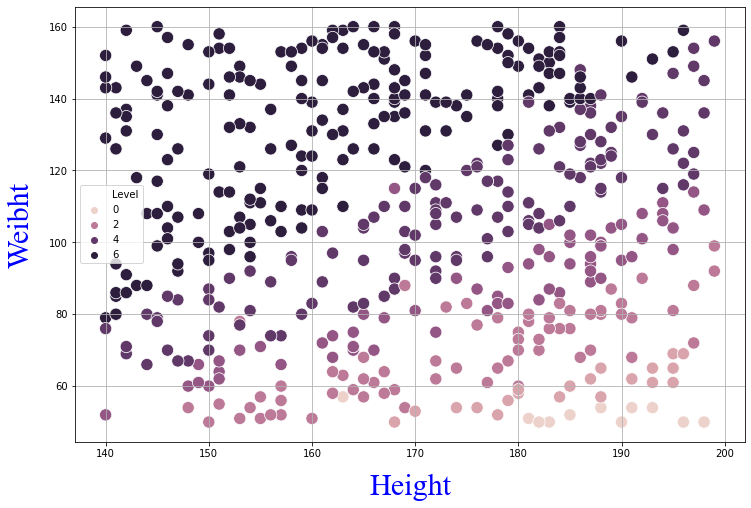

In [9]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Height', y="Weight",hue="Level",data=df1,s=150,cmap=plt.get_cmap("Greens"))
font2 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 30,"color":"blue"}
ax.set_xlabel("Height",font2,labelpad=15)
ax.set_ylabel("Weibht",font2,labelpad=15)
ax.grid(True)

# 选择特征

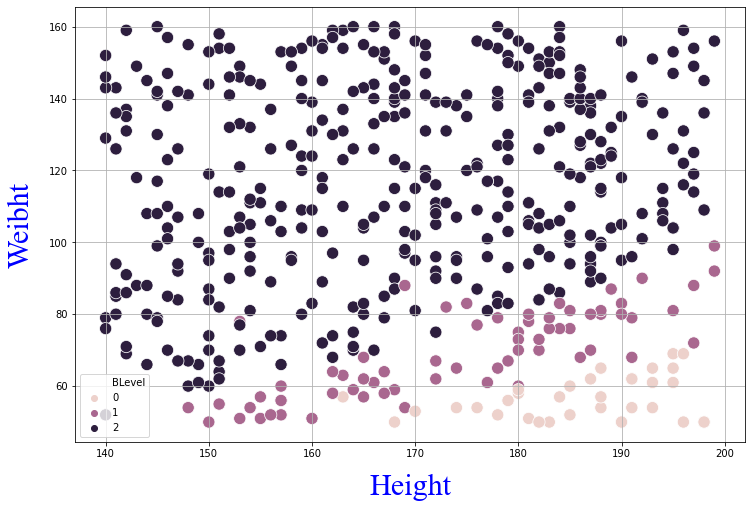

In [10]:
df3 = df1
df3['BLevel'] = df3['Level']
df3.BLevel[df3.BLevel<2] = 0
df3.BLevel[df3.BLevel==2] = 1
df3.BLevel[df3.BLevel>2] = 2

x1=df3['Height'].tolist()
x2=df3['Weight'].tolist()
#x3=df2['Weight_scaled'].tolist()
Y = []
X = []
for xx1,xx2,y1 in zip(x1,x2,df3['BLevel'].tolist()):
    X.append([xx1,xx2])
    Y.append(y1)
X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Height', y="Weight",hue="BLevel",data=df3,s=150,cmap=plt.get_cmap("Greens"))
font2 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 30,"color":"blue"}
ax.set_xlabel("Height",font2,labelpad=15)
ax.set_ylabel("Weibht",font2,labelpad=15)
ax.grid(True)

# 选择模型训练

In [14]:
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)

model1 = SVC(C=1)
model1.fit(X_train,Y_train)

model2 = LinearDiscriminantAnalysis()
model2.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

# 评估准确率

SVM:  0.9657142857142857


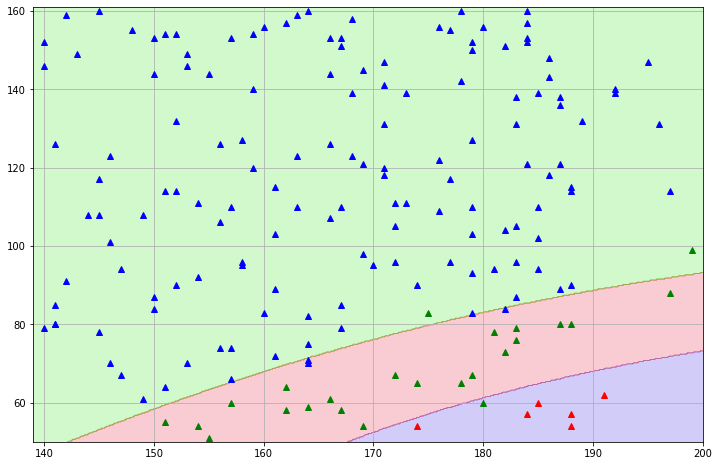

LogisticRegression:  0.9714285714285714


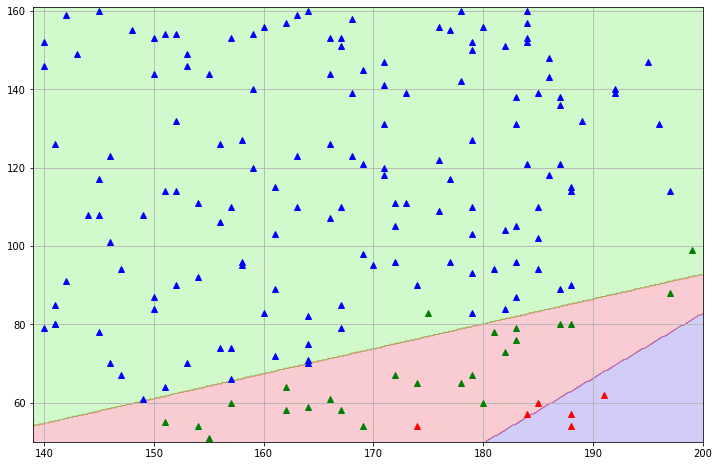

In [15]:
Y_test_pred = model1.predict(X_test)
accuracy1 = accuracy_score(Y_test, Y_test_pred)
print("SVM: ",accuracy1)
plt.figure(figsize=(12,8))
plot_predict_curve(model1,X_test, Y_test)

Y_test_pred = model2.predict(X_test)
accuracy2 = accuracy_score(Y_test, Y_test_pred)
print("LogisticRegression: ",accuracy2)
plt.figure(figsize=(12,8))
plot_predict_curve(model2,X_test, Y_test)

# 预测

In [20]:
height = 185
weight = 60
test_data = np.array([[height,weight]])
pred = model1.predict(test_data)
if pred[0] == 0:
    level = "瘦"
if pred[0] == 1:
    level = "正常"
if pred[0] == 2:
    level = "胖"
print("高：%dcm 重：%dkg 结果: %s"%(height,weight,level))

高：185cm 重：60kg 结果: 瘦
